# Extract the Olympic, Population, Population Density, and GDP csv Data.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import json
pd.set_option('max_colwidth', 400)

In [2]:
# Read the Olympic data into a Pandas DataFrame.
olympic_df = pd.read_csv('Resources/Olympics.csv', header=0)
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Change NaN values to null values
olympic_df.replace(np.nan, None, inplace=True)

# Display the DataFrame with NaN values replaced by null values
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [4]:
# Concatenate Team and Year
olympic_df['Country_Year'] = olympic_df['Team'] + ' ' + olympic_df['Year'].astype(str)

# Display the DataFrame with the new index column as the first column
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country_Year
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China 1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China 2012
2,3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark 1920
3,4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark 1900
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands 1988


In [5]:
# Move 'Country_Year' column after 'ID' column
cols = list(olympic_df.columns)
cols.insert(1, cols.pop(cols.index('Country_Year')))
olympic_df = olympic_df[cols]

# Display the DataFrame with 'Country_Year' column after 'ID' column
olympic_df.head()

,ID,Country_Year,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,China 1992,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,China 2012,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Denmark 1920,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Denmark 1900,Edgar Lindenau Aabye,M,34.0,None,None,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Netherlands 1988,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [6]:
# Convert the DataFrame to a list of dictionaries.
dict_values = olympic_df.to_dict(orient='records')

# Write the list of dictionaries to a JSON file.
with open('olympics.json', 'w') as json_file:
    json.dump(dict_values, json_file, indent=4)

print("Data has been successfully converted to JSON and saved to 'olympics.json'")

Data has been successfully converted to JSON and saved to 'olympics.json'


In [7]:
# Read the Olympic data into a Pandas DataFrame.
medal_df = pd.read_csv('Resources/Medal Counts.csv', header=0)
medal_df.head()

,Country_Year,Year,BronzeCount,SilverCount,GoldCount,TotalMedalCount,Density Value,GDP Value,Pop Value,DensityPerBronze,...,DensityPerGold,DensityPerTotal,GDPPerBronze,GDPPerSilver,GDPPerGold,GDPPerTotal,PopulationPerBronze,PopulationPerSilver,PopulationPerGold,PopulationPerTotal
0,Afghanistan 2008,2008,1,0,0,1,40.518221,1.010930e+10,26427199,40.518221,...,NaN,40.518221,1.010930e+10,NaN,NaN,1.010930e+10,26427199.0,NaN,NaN,2.642720e+07
1,Afghanistan 2012,2012,1,0,0,1,46.711251,1.990733e+10,30466479,46.711251,...,NaN,46.711251,1.990733e+10,NaN,NaN,1.990733e+10,30466479.0,NaN,NaN,3.046648e+07
2,Algeria 1984,1984,2,0,0,2,8.982311,5.369855e+10,21393530,4.491156,...,NaN,4.491156,2.684927e+10,NaN,NaN,2.684927e+10,10696765.0,NaN,NaN,1.069676e+07
3,Algeria 1992,1992,1,0,1,2,11.230572,4.800313e+10,26748303,11.230572,...,11.230572,5.615286,4.800313e+10,NaN,4.800313e+10,2.400157e+10,26748303.0,NaN,26748303.0,1.337415e+07
4,Algeria 1996,1996,1,0,2,3,12.169521,4.694155e+10,28984634,12.169521,...,6.084760,4.056507,4.694155e+10,NaN,2.347078e+10,1.564718e+10,28984634.0,NaN,14492317.0,9.661545e+06


In [8]:
# Change NaN values to null values
medal_df.replace(np.nan, None, inplace=True)

# Display the DataFrame with NaN values replaced by null values
medal_df.head()

,Country_Year,Year,BronzeCount,SilverCount,GoldCount,TotalMedalCount,Density Value,GDP Value,Pop Value,DensityPerBronze,...,DensityPerGold,DensityPerTotal,GDPPerBronze,GDPPerSilver,GDPPerGold,GDPPerTotal,PopulationPerBronze,PopulationPerSilver,PopulationPerGold,PopulationPerTotal
0,Afghanistan 2008,2008,1,0,0,1,40.518221,1.010930e+10,26427199,40.518221,...,None,40.518221,10109296958.0,None,None,1.010930e+10,26427199.0,None,None,2.642720e+07
1,Afghanistan 2012,2012,1,0,0,1,46.711251,1.990733e+10,30466479,46.711251,...,None,46.711251,19907329906.0,None,None,1.990733e+10,30466479.0,None,None,3.046648e+07
2,Algeria 1984,1984,2,0,0,2,8.982311,5.369855e+10,21393530,4.491156,...,None,4.491156,26849274146.5,None,None,2.684927e+10,10696765.0,None,None,1.069676e+07
3,Algeria 1992,1992,1,0,1,2,11.230572,4.800313e+10,26748303,11.230572,...,11.230572,5.615286,48003133347.0,None,48003133347.0,2.400157e+10,26748303.0,None,26748303.0,1.337415e+07
4,Algeria 1996,1996,1,0,2,3,12.169521,4.694155e+10,28984634,12.169521,...,6.08476,4.056507,46941554225.0,None,23470777112.5,1.564718e+10,28984634.0,None,14492317.0,9.661545e+06


In [9]:
# Extract the country name from the 'Country_Year' column
medal_df['Country'] = medal_df['Country_Year'].str.rsplit(n=1).str[0]
medal_df.head()

,Country_Year,Year,BronzeCount,SilverCount,GoldCount,TotalMedalCount,Density Value,GDP Value,Pop Value,DensityPerBronze,...,DensityPerTotal,GDPPerBronze,GDPPerSilver,GDPPerGold,GDPPerTotal,PopulationPerBronze,PopulationPerSilver,PopulationPerGold,PopulationPerTotal,Country
0,Afghanistan 2008,2008,1,0,0,1,40.518221,1.010930e+10,26427199,40.518221,...,40.518221,10109296958.0,None,None,1.010930e+10,26427199.0,None,None,2.642720e+07,Afghanistan
1,Afghanistan 2012,2012,1,0,0,1,46.711251,1.990733e+10,30466479,46.711251,...,46.711251,19907329906.0,None,None,1.990733e+10,30466479.0,None,None,3.046648e+07,Afghanistan
2,Algeria 1984,1984,2,0,0,2,8.982311,5.369855e+10,21393530,4.491156,...,4.491156,26849274146.5,None,None,2.684927e+10,10696765.0,None,None,1.069676e+07,Algeria
3,Algeria 1992,1992,1,0,1,2,11.230572,4.800313e+10,26748303,11.230572,...,5.615286,48003133347.0,None,48003133347.0,2.400157e+10,26748303.0,None,26748303.0,1.337415e+07,Algeria
4,Algeria 1996,1996,1,0,2,3,12.169521,4.694155e+10,28984634,12.169521,...,4.056507,46941554225.0,None,23470777112.5,1.564718e+10,28984634.0,None,14492317.0,9.661545e+06,Algeria


In [10]:
# Check the data types of your dataset
print(medal_df.dtypes)

Country_Year            object
Year                     int64
BronzeCount              int64
SilverCount              int64
GoldCount                int64
TotalMedalCount          int64
Density Value          float64
GDP Value              float64
Pop Value                int64
DensityPerBronze        object
DensityPerSilver        object
DensityPerGold          object
DensityPerTotal        float64
GDPPerBronze            object
GDPPerSilver            object
GDPPerGold              object
GDPPerTotal            float64
PopulationPerBronze     object
PopulationPerSilver     object
PopulationPerGold       object
PopulationPerTotal     float64
Country                 object
dtype: object


In [11]:
# Filter the DataFrame to include data from 1964 onwards
medal_df_filtered = medal_df[medal_df['Year'] >= 1964]

# Get sum of each medal count and total by Country
country_summary = medal_df_filtered.groupby('Country').agg({
    'BronzeCount': 'sum',
    'SilverCount': 'sum',
    'GoldCount': 'sum',
    'TotalMedalCount': 'sum'
}).reset_index()

# Sort the DataFrame by TotalMedalCount in descending order
country_summary_top = country_summary.sort_values(by='TotalMedalCount', ascending=False)

# Display the sorted summary
print("Top Ten Medal Counts by Country from 1964 to 2016:")
print(country_summary_top.head(10))

Top Ten Medal Counts by Country from 1964 to 2016:
                Country  BronzeCount  SilverCount  GoldCount  TotalMedalCount
117       United States          836         1042       1628             3506
41              Germany          905          849        986             2740
91   Russian Federation          480          431        516             1427
4             Australia          450          390        287             1127
20                China          311          376        354             1041
18               Canada          310          310        324              944
54                Italy          349          317        249              915
116      United Kingdom          301          281        268              850
38               France          333          253        247              833
56                Japan          322          244        212              778


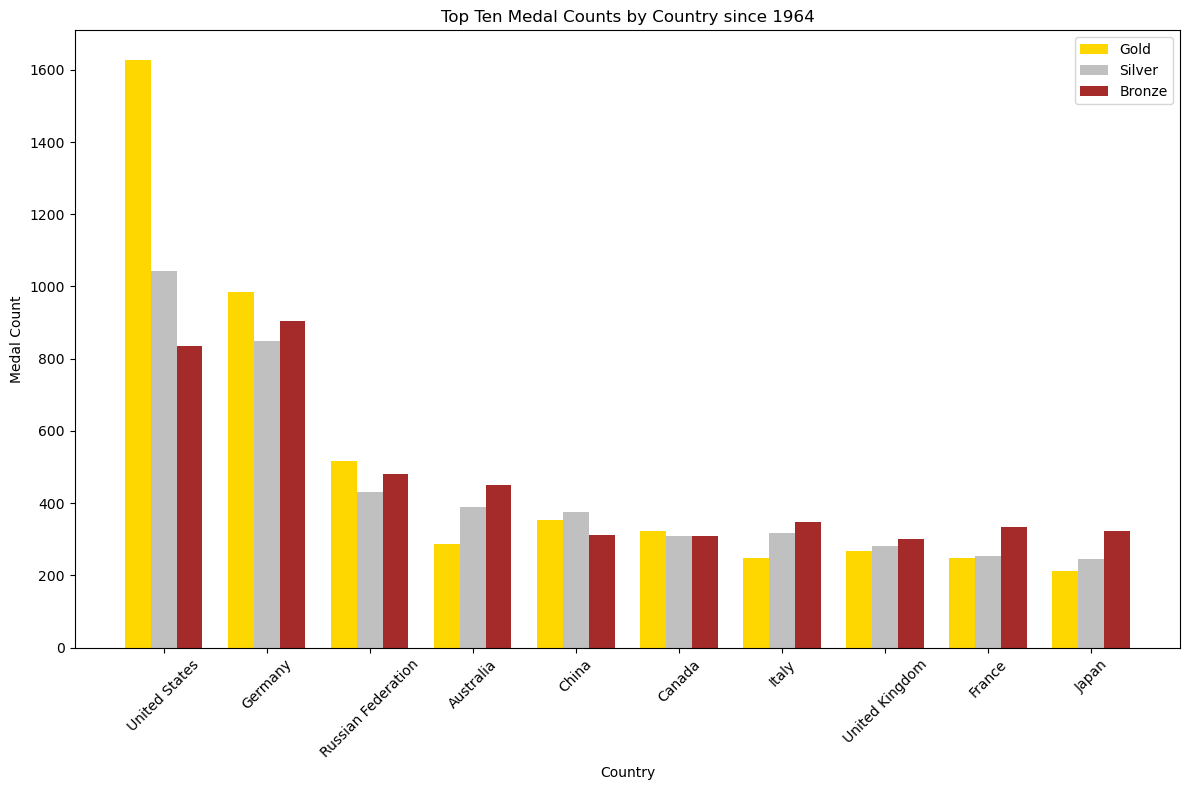

In [14]:
import matplotlib.pyplot as plt

# Select top ten countries
top_ten_countries = country_summary_top.head(10)

# Set the country names as x-axis labels
countries = top_ten_countries['Country']

# Set the medal counts for each country
gold_counts = top_ten_countries['GoldCount']
silver_counts = top_ten_countries['SilverCount']
bronze_counts = top_ten_countries['BronzeCount']

# Create grouped bar chart
bar_width = 0.25
index = range(len(countries))

plt.figure(figsize=(12, 8))

plt.bar(index, gold_counts, color='gold', width=bar_width, label='Gold')
plt.bar([i + bar_width for i in index], silver_counts, color='silver', width=bar_width, label='Silver')
plt.bar([i + 2 * bar_width for i in index], bronze_counts, color='brown', width=bar_width, label='Bronze') # corrected indexing here

plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Top Ten Medal Counts by Country since 1964')
plt.xticks([i + bar_width for i in index], countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Sort the DataFrame by TotalMedalCount in descending order
country_summary_bottom = country_summary.sort_values(by='TotalMedalCount', ascending=True)

# Display the sorted summary
print("Bottom Ten Medal Counts by Country since 1964:")
print(country_summary_bottom.head(10))

Bottom Ten Medal Counts by Country since 1964:
            Country  BronzeCount  SilverCount  GoldCount  TotalMedalCount
13         Botswana            0            1          0                1
33          Eritrea            1            0          0                1
39            Gabon            0            1          0                1
45        Guatemala            0            1          0                1
46           Guyana            1            0          0                1
57           Jordan            0            0          1                1
67        Mauritius            1            0          0                1
29         Djibouti            1            0          0                1
12          Bermuda            1            0          0                1
79  North Macedonia            1            0          0                1


In [16]:
from tabulate import tabulate

# Calculate average GDP, density, and population values for each country
country_avg_values = medal_df.groupby('Country').agg({
    'GDP Value': 'mean',
    'Density Value': 'mean',
    'Pop Value': 'mean'
}).reset_index()

# Sort by average GDP value and select the top ten countries
top_ten_countries = country_avg_values.nlargest(10, 'GDP Value')

# Display the top ten countries with their average values
print("Top Ten Countries by Average GDP, Pop. Density and Population Value:")
print(tabulate(top_ten_countries[['Country', 'GDP Value', 'Density Value', 'Pop Value']], headers='keys', tablefmt='pretty'))

Top Ten Countries by Average GDP, Pop. Density and Population Value:
+-----+--------------------+--------------------+--------------------+--------------------+
|     |      Country       |     GDP Value      |   Density Value    |     Pop Value      |
+-----+--------------------+--------------------+--------------------+--------------------+
| 117 |   United States    |  8872950000000.0   | 29.066054790499997 |    266134633.45    |
| 56  |       Japan        |  3522137450319.1   |   332.505250865    |    121356100.0     |
| 20  |       China        | 3252740392253.1875 |  130.85271605625   |    1228474687.5    |
| 41  |      Germany       | 2269166666666.6665 | 231.57429846111114 | 80809943.72222222  |
| 116 |   United Kingdom   |  1520070377917.55  |   244.049884265    |     59042988.5     |
| 38  |       France       |  1492550392552.35  |   108.6882873665   |    59513705.75     |
| 14  |       Brazil       | 1219285714285.7144 | 21.912655157142858 | 183149039.57142857 |
| 54  |    

In [17]:
# Sort the DataFrame by average GDP value in descending order
bottom_ten_countries_sorted = country_avg_values.sort_values(by='GDP Value', ascending=False)

# Select the bottom ten countries
bottom_ten_countries = bottom_ten_countries_sorted.tail(10)

# Display the bottom ten countries with their average values
pd.options.display.float_format = '{:.2f}'.format  # Formatting GDP as dollar value
print("Bottom Ten Countries by Average GDP Value (Highest GDP to Lowest):")
print(tabulate(bottom_ten_countries[['Country', 'GDP Value', 'Density Value', 'Pop Value']], headers='keys', tablefmt='pretty'))

Bottom Ten Countries by Average GDP Value (Highest GDP to Lowest):
+-----+---------------+---------------+--------------------+-----------+
|     |    Country    |   GDP Value   |   Density Value    | Pop Value |
+-----+---------------+---------------+--------------------+-----------+
|  9  |   Barbados    | 3059500000.0  |    615.4813953     | 264657.0  |
| 16  |    Burundi    | 1756760816.65 |    327.7615654     | 8416917.0 |
| 33  |    Eritrea    | 1109054005.0  |    22.83914736     | 2763140.0 |
| 44  |    Grenada    | 930761111.25  |    346.8794118     | 117939.0  |
| 102 |   Suriname    |  782800000.0  | 2.6335256410000003 | 410830.0  |
| 64  | Liechtenstein | 617891831.575 |    160.5984375     | 25695.75  |
| 46  |    Guyana     |  603200000.0  |    3.953141986     | 778176.0  |
| 29  |   Djibouti    |  395794538.6  |    20.80832614     | 482337.0  |
| 12  |    Bermuda    |  386300000.0  |    985.1851852     |  53200.0  |
| 109 |     Tonga     |  222100576.3  |    139.1597222   

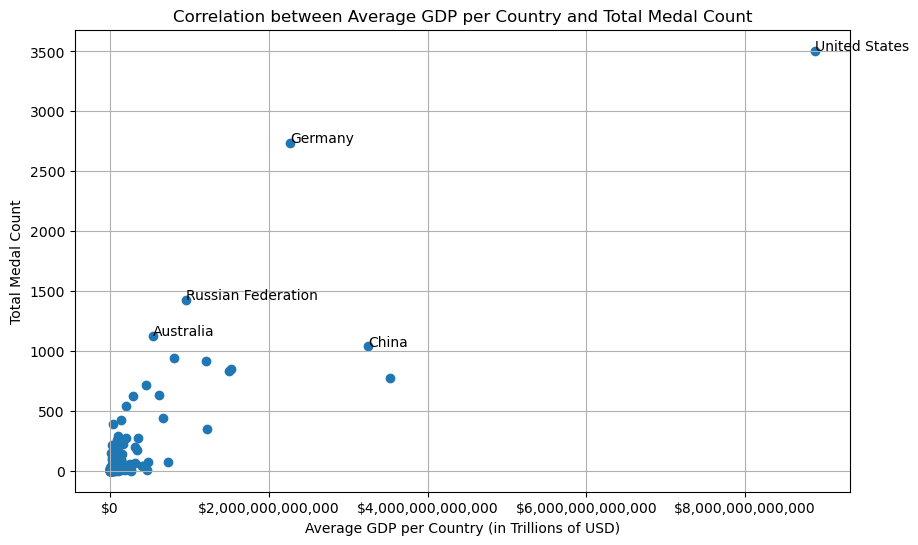

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate average GDP per country
average_gdp_per_country = medal_df.groupby('Country')['GDP Value'].mean()

# Plot the correlation between average GDP per country and Total Medal Count
plt.figure(figsize=(10, 6))
plt.scatter(average_gdp_per_country, medal_df.groupby('Country')['TotalMedalCount'].sum())
plt.xlabel('Average GDP per Country (in Trillions of USD)')
plt.ylabel('Total Medal Count')
plt.title('Correlation between Average GDP per Country and Total Medal Count')

# Format x-axis ticks to display in dollar format
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Label top 5 medal count countries
top_countries = medal_df.groupby('Country')['TotalMedalCount'].sum().nlargest(5)
for country in top_countries.index:
    plt.text(average_gdp_per_country[country], medal_df.groupby('Country')['TotalMedalCount'].sum()[country], country)

plt.grid(True)
plt.show()

In [19]:
# Calculate correlation coefficients
correlation_coefficients = medal_df[['TotalMedalCount', 'GDP Value', 'Pop Value', 'Density Value']].corr()

# Extract correlation coefficient of TotalMedalCount with other variables
medal_to_gdp_corr = correlation_coefficients.loc['TotalMedalCount', 'GDP Value']
medal_to_pop_corr = correlation_coefficients.loc['TotalMedalCount', 'Pop Value']
medal_to_density_corr = correlation_coefficients.loc['TotalMedalCount', 'Density Value']

print(f"Correlation coefficient between Total Medal Count and Average GDP: {medal_to_gdp_corr:.2f}")
print(f"Correlation coefficient between Total Medal Count and Population: {medal_to_pop_corr:.2f}")
print(f"Correlation coefficient between Total Medal Count and Population Density: {medal_to_density_corr:.2f}")

Correlation coefficient between Total Medal Count and Average GDP: 0.50
Correlation coefficient between Total Medal Count and Population: 0.21
Correlation coefficient between Total Medal Count and Population Density: -0.02


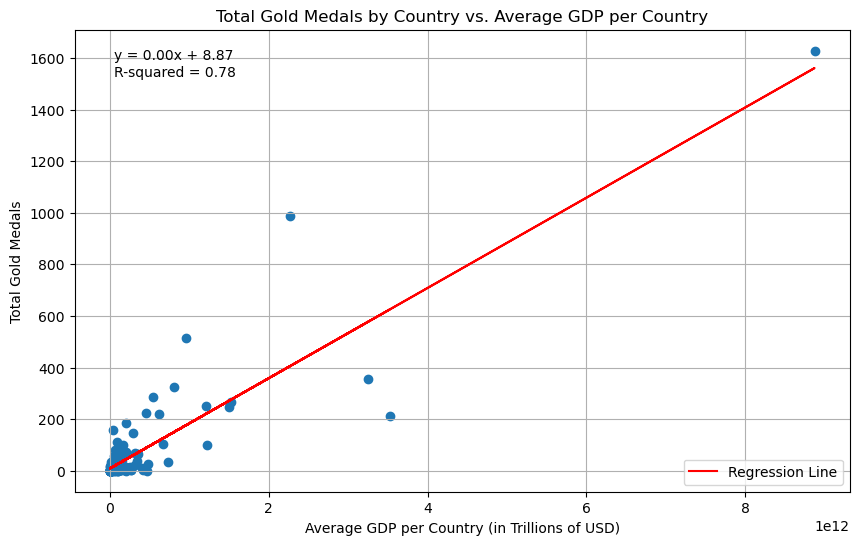

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate total gold medals by country
total_gold_medals = medal_df.groupby('Country')['GoldCount'].sum()

# Calculate average GDP per country
average_gdp_per_country = medal_df.groupby('Country')['GDP Value'].mean()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(average_gdp_per_country, total_gold_medals)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_gdp_per_country, total_gold_medals)
plt.xlabel('Average GDP per Country (in Trillions of USD)')
plt.ylabel('Total Gold Medals')
plt.title('Total Gold Medals by Country vs. Average GDP per Country')

# Plot the regression line
plt.plot(average_gdp_per_country, slope * average_gdp_per_country + intercept, color='red', label='Regression Line')

# Annotate the equation of the regression line
plt.text(0.05, 0.9, f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}', transform=plt.gca().transAxes)

# Move the legend to the opposite side
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [21]:
# Filter the DataFrame to include only data for the 2016 Olympics
medal_df_2016 = medal_df[medal_df['Year'] == 2016]

# Get the sum of gold medal counts by country for the 2016 Olympics
gold_summary_2016 = medal_df_2016.groupby('Country')['GoldCount'].sum().reset_index()

# Sort the DataFrame by gold medal count in descending order
gold_summary_2016_sorted = gold_summary_2016.sort_values(by='GoldCount', ascending=False)

# Merge the GDP data for the year 2016 with the gold medal summary
gold_summary_2016_with_gdp = pd.merge(gold_summary_2016_sorted, medal_df_2016[['Country', 'GDP Value']], on='Country', how='left')

# Add a column for GDP per gold medal
gold_summary_2016_with_gdp['GDPPerGold'] = gold_summary_2016_with_gdp['GDP Value'] / gold_summary_2016_with_gdp['GoldCount']

# Format GDP and GDPPerGold columns to display in dollar format
gold_summary_2016_with_gdp['GDP Value'] = gold_summary_2016_with_gdp['GDP Value'].map('${:,.2f}'.format)
gold_summary_2016_with_gdp['GDPPerGold'] = gold_summary_2016_with_gdp['GDPPerGold'].map('${:,.2f}'.format)

# Display the sorted summary for the top ten gold medal counts in 2016
print("Top Ten Gold Medal Counts by Country for the 2016 Olympics with GDP 'spent' per Gold Medal (in USD):")
print(gold_summary_2016_with_gdp.head(10))

Top Ten Gold Medal Counts by Country for the 2016 Olympics with GDP 'spent' per Gold Medal (in USD):
              Country  GoldCount               GDP Value           GDPPerGold
0       United States        139  $18,700,000,000,000.00  $134,532,374,100.72
1      United Kingdom         64   $2,690,000,000,000.00   $42,031,250,000.00
2  Russian Federation         52   $1,280,000,000,000.00   $24,615,384,615.38
3             Germany         49   $3,470,000,000,000.00   $70,816,326,530.61
4               China         47  $11,200,000,000,000.00  $238,297,872,340.43
5              Brazil         36   $1,800,000,000,000.00   $50,000,000,000.00
6           Australia         23   $1,210,000,000,000.00   $52,608,695,652.17
7           Argentina         21     $558,000,000,000.00   $26,571,428,571.43
8              France         20   $2,470,000,000,000.00  $123,500,000,000.00
9               Japan         17   $5,000,000,000,000.00  $294,117,647,058.82


In [22]:
# Filter the DataFrame to include only data for the 2016 Olympics
medal_df_2016 = medal_df[medal_df['Year'] == 2016]

# Get the sum of gold medal counts by country for the 2016 Olympics
gold_summary_2016 = medal_df_2016.groupby('Country')['GoldCount'].sum().reset_index()

# Sort the DataFrame by gold medal count in descending order
gold_summary_2016_sorted = gold_summary_2016.sort_values(by='GoldCount', ascending=False)

# Merge the GDP data for the year 2016 with the gold medal summary
gold_summary_2016_with_gdp = pd.merge(gold_summary_2016_sorted, medal_df_2016[['Country', 'GDP Value']], on='Country', how='left')

# Add a column for GDP per gold medal
gold_summary_2016_with_gdp['GDPPerGold'] = gold_summary_2016_with_gdp['GDP Value'] / gold_summary_2016_with_gdp['GoldCount']

# Format GDP and GDPPerGold columns to display in dollar format
gold_summary_2016_with_gdp['GDP Value'] = gold_summary_2016_with_gdp['GDP Value'].map('${:,.2f}'.format)
gold_summary_2016_with_gdp['GDPPerGold'] = gold_summary_2016_with_gdp['GDPPerGold'].map('${:,.2f}'.format)

# Display the sorted summary for the top ten gold medal counts in 2016
print("Top Ten Gold Medal Counts by Country for the 2016 Olympics with GDP per Gold Medal (in USD):")
print(gold_summary_2016_with_gdp.head(10))

Top Ten Gold Medal Counts by Country for the 2016 Olympics with GDP per Gold Medal (in USD):
              Country  GoldCount               GDP Value           GDPPerGold
0       United States        139  $18,700,000,000,000.00  $134,532,374,100.72
1      United Kingdom         64   $2,690,000,000,000.00   $42,031,250,000.00
2  Russian Federation         52   $1,280,000,000,000.00   $24,615,384,615.38
3             Germany         49   $3,470,000,000,000.00   $70,816,326,530.61
4               China         47  $11,200,000,000,000.00  $238,297,872,340.43
5              Brazil         36   $1,800,000,000,000.00   $50,000,000,000.00
6           Australia         23   $1,210,000,000,000.00   $52,608,695,652.17
7           Argentina         21     $558,000,000,000.00   $26,571,428,571.43
8              France         20   $2,470,000,000,000.00  $123,500,000,000.00
9               Japan         17   $5,000,000,000,000.00  $294,117,647,058.82


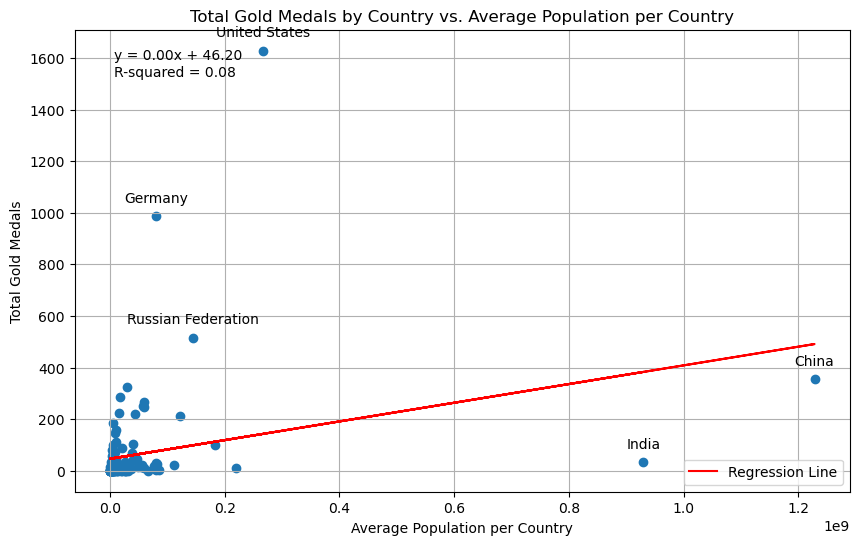

In [23]:
# Calculate total gold medals by country
total_gold_medals = medal_df.groupby('Country')['GoldCount'].sum()

# Calculate average population per country
average_population_per_country = medal_df.groupby('Country')['Pop Value'].mean()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(average_population_per_country, total_gold_medals)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_population_per_country, total_gold_medals)
plt.xlabel('Average Population per Country')
plt.ylabel('Total Gold Medals')
plt.title('Total Gold Medals by Country vs. Average Population per Country')

# Plot the regression line
plt.plot(average_population_per_country, slope * average_population_per_country + intercept, color='red', label='Regression Line')

# Annotate the equation of the regression line
plt.text(0.05, 0.9, f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}', transform=plt.gca().transAxes)

# Add country descriptors for specific countries
countries_to_annotate = ['United States','Russian Federation','Germany','India', 'China']  # Add the countries you want to annotate
for country in countries_to_annotate:
    x = average_population_per_country[country]
    y = total_gold_medals[country]
    plt.annotate(country, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Move the legend to the opposite side
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

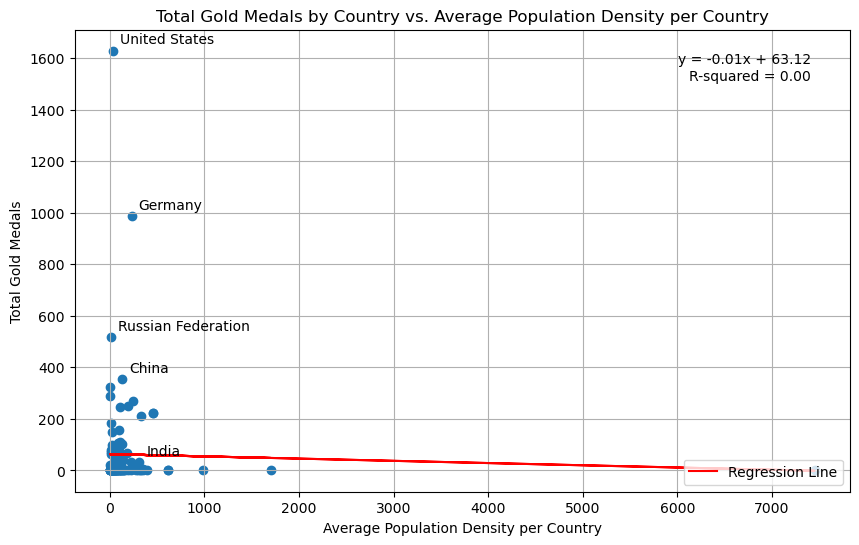

In [24]:
# Calculate total gold medals by country
total_gold_medals = medal_df.groupby('Country')['GoldCount'].sum()

# Calculate average population density per country
average_density_per_country = medal_df.groupby('Country')['Density Value'].mean()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(average_density_per_country, total_gold_medals)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_density_per_country, total_gold_medals)
plt.xlabel('Average Population Density per Country')
plt.ylabel('Total Gold Medals')
plt.title('Total Gold Medals by Country vs. Average Population Density per Country')

# Plot the regression line
plt.plot(average_density_per_country, slope * average_density_per_country + intercept, color='red', label='Regression Line')

# Add country descriptors for specific countries
countries_to_annotate = ['United States', 'Russian Federation', 'Germany', 'India', 'China']  # Add the countries you want to annotate
for country in countries_to_annotate:
    x = average_density_per_country[country]
    y = total_gold_medals[country]
    plt.annotate(country, (x, y), textcoords="offset points", xytext=(5,5), ha='left')

# Annotate the equation of the regression line
plt.text(0.95, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

# Move the legend to the upper right
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

In [9]:
# Convert the DataFrame to a list of dictionaries.
dict_values = medal_df.to_dict(orient='records')

# Write the list of dictionaries to a JSON file.
with open('medal count.json', 'w') as json_file:
    json.dump(dict_values, json_file, indent=4)

print("Data has been successfully converted to JSON and saved to 'medal count.json'")

Data has been successfully converted to JSON and saved to 'medal count.json'


In [10]:
# Read the Density data into a Pandas DataFrame.
density_df = pd.read_csv('Resources/Density_load.csv', header=0)
density_df.head()

,Country Name,Country Code,D-Indicator Name,D-Indicator Code,Attribute.1,Year,Value
0,Aruba,ABW,Population density (people per sq. km of land area),EN.POP.DNST,D,1961,310.061111
1,Aruba,ABW,Population density (people per sq. km of land area),EN.POP.DNST,D,1962,314.900000
2,Aruba,ABW,Population density (people per sq. km of land area),EN.POP.DNST,D,1963,319.305556
3,Aruba,ABW,Population density (people per sq. km of land area),EN.POP.DNST,D,1964,323.211111
4,Aruba,ABW,Population density (people per sq. km of land area),EN.POP.DNST,D,1965,326.566667


In [11]:
density_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14901 entries, 0 to 14900
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      14901 non-null  object 
 1   Country Code      14901 non-null  object 
 2   D-Indicator Name  14901 non-null  object 
 3   D-Indicator Code  14901 non-null  object 
 4   Attribute.1       14901 non-null  object 
 5   Year              14901 non-null  int64  
 6   Value             14901 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 815.0+ KB


In [12]:
# Drop unnecessary columns
density_df.drop(columns=['D-Indicator Name', 'D-Indicator Code', 'Attribute.1'], inplace=True)

# Display the modified DataFrame
density_df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1961,310.061111
1,Aruba,ABW,1962,314.900000
2,Aruba,ABW,1963,319.305556
3,Aruba,ABW,1964,323.211111
4,Aruba,ABW,1965,326.566667


In [13]:
# Rename the 'Value' column
density_df.rename(columns={'Value': 'Density'}, inplace=True)

# Display the modified DataFrame
density_df.head()

,Country Name,Country Code,Year,Density
0,Aruba,ABW,1961,310.061111
1,Aruba,ABW,1962,314.900000
2,Aruba,ABW,1963,319.305556
3,Aruba,ABW,1964,323.211111
4,Aruba,ABW,1965,326.566667


In [14]:
# Convert the DataFrame to a list of dictionaries.
dict_values = density_df.to_dict(orient='records')

# Write the list of dictionaries to a JSON file.
with open('density.json', 'w') as json_file:
    json.dump(dict_values, json_file, indent=4)

print("Data has been successfully converted to JSON and saved to 'density.json'")

Data has been successfully converted to JSON and saved to 'density.json'


In [15]:
# Read the GDP data into a Pandas DataFrame.
gdp_df = pd.read_csv('Resources/GDP_load.csv', header=0)
gdp_df.head()

,Country Name,Country Code,G-Indicator Name,G-Indicator Code,Attribute.1,Year,Value
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,G,1986,405586592.2
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,G,1987,487709497.2
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,G,1988,596648044.7
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,G,1989,695530726.3
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,G,1990,764804469.3


In [16]:
# Drop unnecessary columns
gdp_df.drop(columns=['G-Indicator Name', 'G-Indicator Code', 'Attribute.1'], inplace=True)

# Display the modified DataFrame
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1986,405586592.2
1,Aruba,ABW,1987,487709497.2
2,Aruba,ABW,1988,596648044.7
3,Aruba,ABW,1989,695530726.3
4,Aruba,ABW,1990,764804469.3


In [17]:
# Rename the 'Value' column
gdp_df.rename(columns={'Value': 'GDP'}, inplace=True)

# Display the modified DataFrame
gdp_df.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1986,405586592.2
1,Aruba,ABW,1987,487709497.2
2,Aruba,ABW,1988,596648044.7
3,Aruba,ABW,1989,695530726.3
4,Aruba,ABW,1990,764804469.3


In [18]:
# Convert the DataFrame to a list of dictionaries.
dict_values = gdp_df.to_dict(orient='records')

# Write the list of dictionaries to a JSON file.
with open('gdp.json', 'w') as json_file:
    json.dump(dict_values, json_file, indent=4)

print("Data has been successfully converted to JSON and saved to 'gdp.json'")

Data has been successfully converted to JSON and saved to 'gdp.json'


In [19]:
# Read the Population data into a Pandas DataFrame.
population_df = pd.read_csv('Resources/Population_load.csv', header=0)
population_df.head()

,Country Name,Country Code,P-Indicator Name,P-Indicator Code,Attribute.1,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,P,1960,54608
1,Aruba,ABW,"Population, total",SP.POP.TOTL,P,1961,55811
2,Aruba,ABW,"Population, total",SP.POP.TOTL,P,1962,56682
3,Aruba,ABW,"Population, total",SP.POP.TOTL,P,1963,57475
4,Aruba,ABW,"Population, total",SP.POP.TOTL,P,1964,58178


In [20]:
# Drop unnecessary columns
population_df.drop(columns=['P-Indicator Name', 'P-Indicator Code', 'Attribute.1'], inplace=True)

# Display the modified DataFrame
population_df.head()

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54608
1,Aruba,ABW,1961,55811
2,Aruba,ABW,1962,56682
3,Aruba,ABW,1963,57475
4,Aruba,ABW,1964,58178


In [21]:
# Rename the 'Value' column
population_df.rename(columns={'Value': 'Population'}, inplace=True)

# Display the modified DataFrame
population_df.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54608
1,Aruba,ABW,1961,55811
2,Aruba,ABW,1962,56682
3,Aruba,ABW,1963,57475
4,Aruba,ABW,1964,58178


In [22]:
# Convert the DataFrame to a list of dictionaries.
dict_values = population_df.to_dict(orient='records')

# Write the list of dictionaries to a JSON file.
with open('population.json', 'w') as json_file:
    json.dump(dict_values, json_file, indent=4)

print("Data has been successfully converted to JSON and saved to 'population.json'")

Data has been successfully converted to JSON and saved to 'population.json'


In [23]:
import numpy as np

# Concatenate 'Country Name' and 'Year' columns to create a new column
density_df['Country_Year'] = density_df['Country Name'] + '_' + density_df['Year'].astype(str)
gdp_df['Country_Year'] = gdp_df['Country Name'] + '_' + gdp_df['Year'].astype(str)
population_df['Country_Year'] = population_df['Country Name'] + ' ' + population_df['Year'].astype(str)

# Replace null values with a specific value
density_df.fillna(value=np.nan, inplace=True)
gdp_df.fillna(value=np.nan, inplace=True)
population_df.fillna(value=np.nan, inplace=True)

# Merge the dataframes based on the 'Country Name' and 'Year' columns
merged_df = pd.merge(density_df, gdp_df, on=['Country Name', 'Year'], how='outer')
merged_df = pd.merge(merged_df, population_df, on=['Country Name', 'Year'], how='outer')

# Select specific columns to keep
merged_df = merged_df[['Country Name', 'Year', 
                       'Density',
                       'GDP', 'Country Code', 'Population', 
                       'Country_Year']]

merged_df.head()

,Country Name,Year,Density,GDP,Country Code,Population,Country_Year
0,Aruba,1961,310.061111,NaN,ABW,55811,Aruba 1961
1,Aruba,1962,314.900000,NaN,ABW,56682,Aruba 1962
2,Aruba,1963,319.305556,NaN,ABW,57475,Aruba 1963
3,Aruba,1964,323.211111,NaN,ABW,58178,Aruba 1964
4,Aruba,1965,326.566667,NaN,ABW,58782,Aruba 1965


In [24]:
# Export the merged dataframe to a JSON file
merged_df.to_json('merged_data.json', orient='records')

print("Data has been successfully merged and saved to 'merged_data.json'")

Data has been successfully merged and saved to 'merged_data.json'
